In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [103]:
train = pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Loan_Prediction/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Loan_Prediction/test.csv')

In [3]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#data cleaning 
test.set_index('Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban


In [6]:
train.set_index('Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
#creating a copy of train and test
train_original = train.copy()
test_original = test.copy()

In [9]:
train.describe() #describing the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#shape of the data set
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [11]:
#count the loan status
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

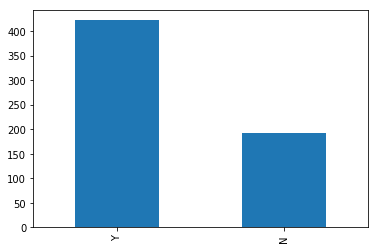

In [12]:
#plotting no. of loan approved
train['Loan_Status'].value_counts().plot.bar()

Visualizing Categorical variable

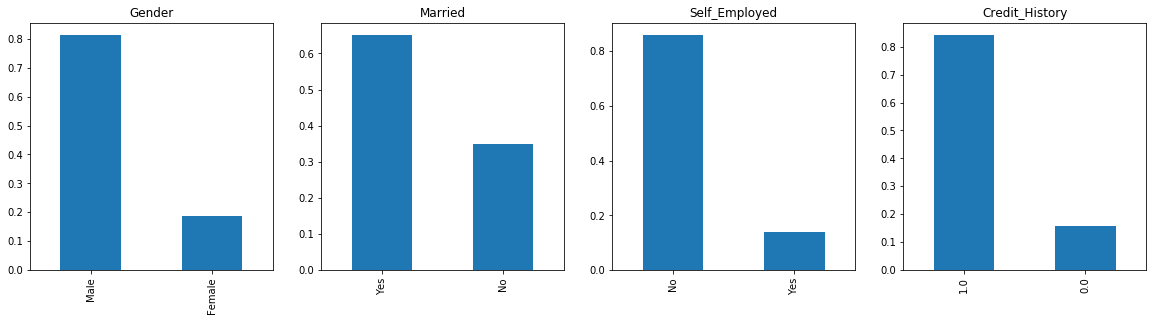

In [13]:
plt.figure(1)
plt.subplot(241)
#ploting gender variatin
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
#ploting married variation
plt.subplot(242)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married')
#ploting self employed variation
plt.subplot(243)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed')
#ploting credit variation
plt.subplot(244)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History')

plt.show()


It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

Visualizing Ordinal variable

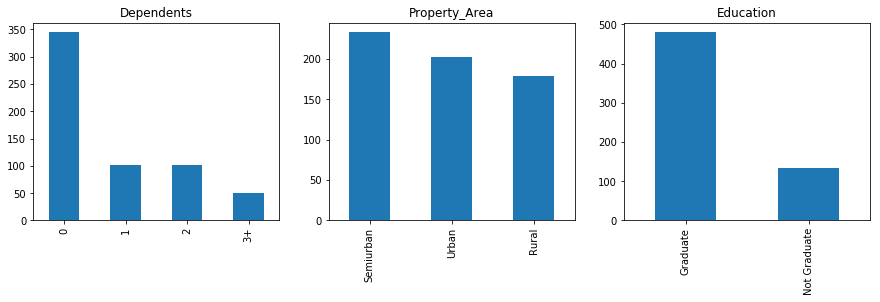

In [14]:
plt.figure(2)
#ploting dependent variation
plt.subplot(231)
train['Dependents'].value_counts().plot.bar(figsize = (15,8), title = 'Dependents')
#ploting property area variation
plt.subplot(232)
train['Property_Area'].value_counts().plot.bar(figsize = (15,8), title = 'Property_Area')
#ploting education variation
plt.subplot(233)
train['Education'].value_counts().plot.bar(figsize = (15,8), title = 'Education')

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

Visualizing Numerical Variable
Applicant Income

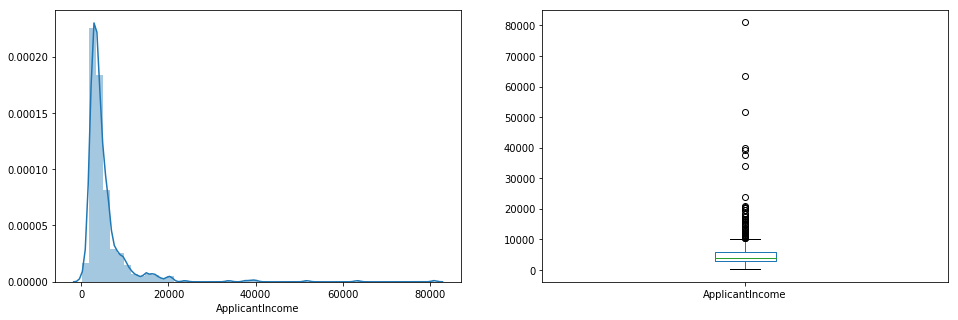

In [15]:
plt.figure(3)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

<Figure size 432x288 with 0 Axes>

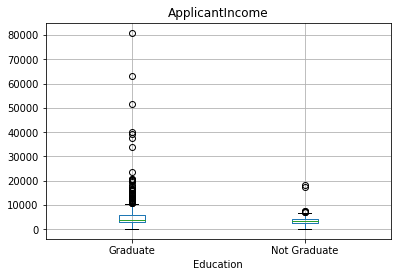

In [16]:
#plotting applicant income vs education
plt.figure(4)
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Coapplicant Income

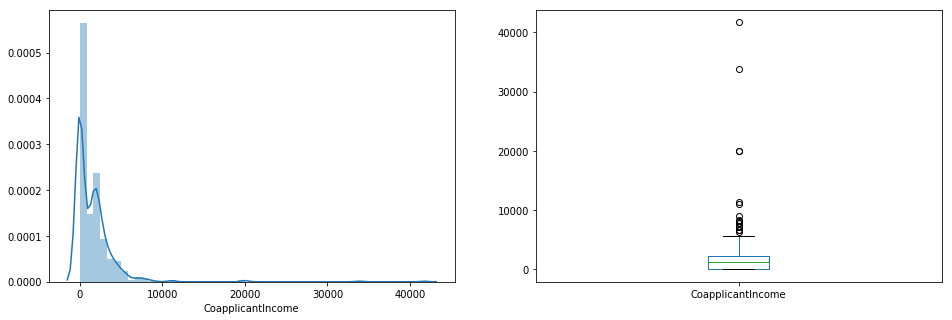

In [17]:
plt.figure(5)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Loan Amount

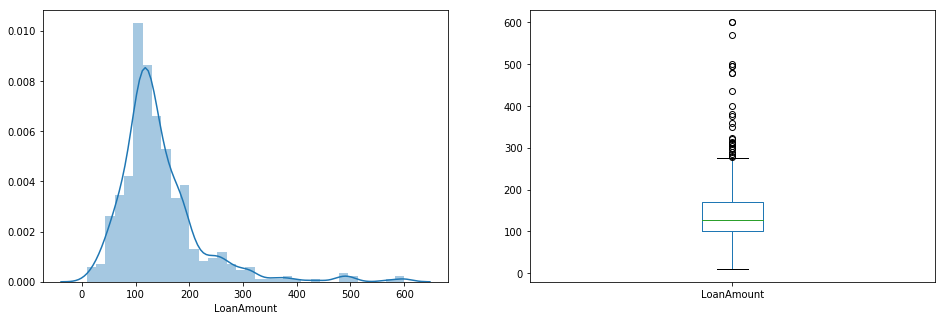

In [18]:
plt.figure(6)

plt.subplot(121)
train_notnull = train.dropna()
sns.distplot(train_notnull['LoanAmount'])

plt.subplot(122)
train_notnull['LoanAmount'].plot.box(figsize = (16,5))

We see a lot of outliers in this variable and the distribution is fairly normal.

Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

Applicants with high income should have more chances of loan approval. Applicants who have repaid their previous debts should have higher chances of loan approval. Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high. Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [19]:
# correlation matrix
cor = train_original.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


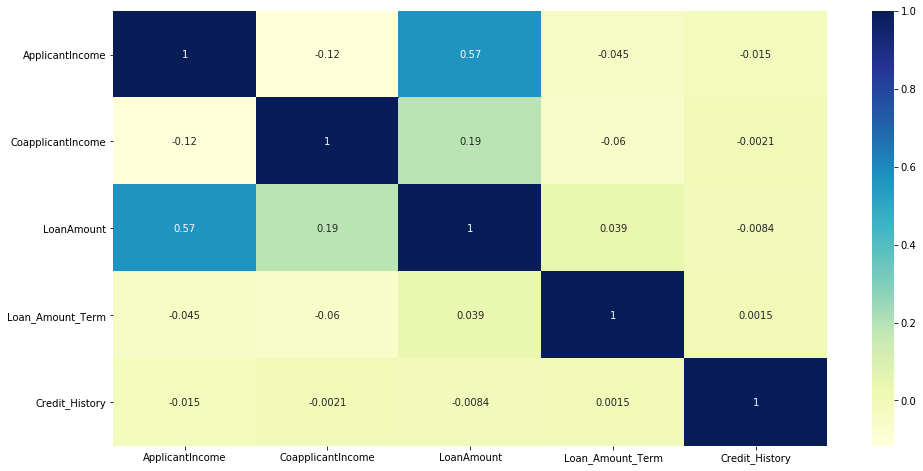

In [20]:
#lets plot a heat map to check the corelation among the variables
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

so we can conclude from the given heat map that credit history is strongly related to loan amount and applicant income but it is negatively related with loan amount term and co-applicant income loan_amount_term is strongly related with credit history and loan amount and is negatively related with applicant and co-applicant income 
loan amount is strongly related with the loan amount term ao applicant income and very strongly with applicant income but it is negatively related with credit history



lets check oure first hypothesis which states Applicants with high income should have more chances of loan approval

In [21]:
def scatterplot(df,var):
    
    plt.scatter(df[var],train['Loan_Status'])
    plt.xlabel(var); plt.ylabel('Loan_Status')
    plt.title('Scatter Plot for '+var+' vs Loan_Status')

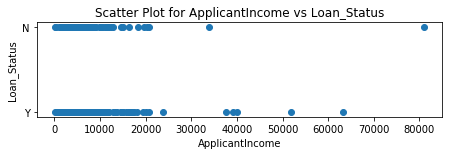

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(4,2,1)
scatterplot(train,'ApplicantIncome')
plt.show()
plt.tight_layout()

so we can conclude from the plot the the applicant having higher income has more chance to get the loan as the density of the scatter is high towards the higher income side

lets check our second hypothesis Applicants who have repaid their previous debts should have higher chances of loan approval.

In [23]:
train.groupby(['Credit_History','Loan_Status']).size().unstack()

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


so it is clear from the above table that the customer who repaid their loan has the higher chance to to get their loan approved

lets check our third hypothesis that Loan approval should also depend on the loan amount

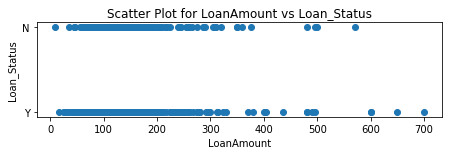

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(4,2,1)
scatterplot(train,'LoanAmount')
plt.show()
plt.tight_layout()

so we can conclude from the plot the the applicant with less loan amount has more chance to get the loan as the density of the scatter is high towards the higher loan side

In [26]:
def dummies(x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [90]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [104]:
train['Gender'].fillna('Male', inplace=True)
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [105]:
train['Married'].fillna('Yes', inplace=True)
train['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
train['Dependents'].fillna(0, inplace=True)
train['Dependents']=np.where(train['Dependents']==0,'0', train['Dependents'])

In [107]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [108]:
train['Self_Employed'].fillna('No', inplace=True)
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['LoanAmount']=train['LoanAmount'].round(0)

In [110]:
train['Loan_Amount_Term'].fillna(360,inplace=True)
train['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [111]:
train['Credit_History'].fillna(1,inplace=True)
train['Credit_History'].unique()

array([1., 0.])

In [112]:
train=dummies('Credit_History', train)
train=dummies('Loan_Amount_Term', train)
train=dummies('Gender', train)
train=dummies('Dependents', train)
train=dummies('Married', train)
train=dummies('Self_Employed', train)

In [113]:
train=dummies('Property_Area', train)
train.head()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,1.0,36.0,60.0,84.0,...,360.0,480.0,Male,1,2,3+,Yes,Yes,Semiurban,Urban
0,LP001002,Graduate,5849,0.0,146.0,Y,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,LP001003,Graduate,4583,1508.0,128.0,N,1,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,LP001005,Graduate,3000,0.0,66.0,Y,1,0,0,0,...,1,0,1,0,0,0,1,1,0,1
3,LP001006,Not Graduate,2583,2358.0,120.0,Y,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,LP001008,Graduate,6000,0.0,141.0,Y,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [114]:
train=dummies('Education', train)

In [255]:
columns=train.columns.tolist()
columns
y=['Loan_Status']
x=[var for var in columns if var not in y]

In [256]:
from sklearn.feature_selection import RFE #Recursive Feature Selection for Selecting Features
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [257]:
rfe = RFE(model, 15)
rfe = rfe.fit(train[x], train[y])

C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed 

In [258]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True False False  True  True
  True  True  True  True False  True False  True False  True False  True]
[10  9  8  1  1  1  1  1  5  3  1  1  1  1  1  1  4  1  6  1  7  1  2  1]


In [259]:
list(zip(train[x].columns,rfe.support_,rfe.ranking_))

[('ApplicantIncome', False, 10),
 ('CoapplicantIncome', False, 9),
 ('LoanAmount', False, 8),
 (1.0, True, 1),
 (36.0, True, 1),
 (60.0, True, 1),
 (84.0, True, 1),
 (120.0, True, 1),
 (180.0, False, 5),
 (240.0, False, 3),
 (300.0, True, 1),
 (360.0, True, 1),
 (480.0, True, 1),
 ('Male', True, 1),
 ('1', True, 1),
 ('2', True, 1),
 ('3+', False, 4),
 ('Yes', True, 1),
 ('Yes', False, 6),
 ('Yes', True, 1),
 ('Yes', False, 7),
 ('Semiurban', True, 1),
 ('Urban', False, 2),
 ('Not Graduate', True, 1)]

In [260]:
num_vars=train[x].columns[rfe.support_]
num_vars

Index([           1.0,           36.0,           60.0,           84.0,
                120.0,          300.0,          360.0,          480.0,
               'Male',            '1',            '2',          'Yes',
                'Yes',    'Semiurban', 'Not Graduate'],
      dtype='object')

In [261]:
x=train[num_vars]
y=train['Loan_Status']

In [277]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [278]:
y_pred=logreg.predict(x_test)
y_pred=pd.DataFrame(y_pred, columns=['Loan_Status'])

In [279]:
y_pred['Loan_Status'].value_counts()

Y    107
N     16
Name: Loan_Status, dtype: int64

In [280]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: ',(accuracy_score(y_test,y_pred )*100).round(3),'%') #accuracy score of the model

Logistic regression accuracy:  82.927 %


In [281]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred=pd.DataFrame(rf.predict(x_test), columns=['Loan_Status'])
acc=accuracy_score(y_test,rf_pred)*100
print('Random Forest accuracy: ',acc.round(3),'%') #accuracy score of the model

Random Forest accuracy:  85.366 %


C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [282]:
rf_pred['Loan_Status'].value_counts()

Y    102
N     21
Name: Loan_Status, dtype: int64

In [283]:
rf_pred['Loan_Status']=np.where(rf_pred['Loan_Status'] =='Y', 0, rf_pred['Loan_Status'])
rf_pred['Loan_Status']=np.where(rf_pred['Loan_Status']=='N', 1, rf_pred['Loan_Status'])

y_pred['Loan_Status']=np.where(y_pred['Loan_Status'] =='Y', 0, y_pred['Loan_Status'])
y_pred['Loan_Status']=np.where(y_pred['Loan_Status']=='N', 1, y_pred['Loan_Status'])

y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index(drop=True)

In [284]:
y_test['Loan_Status']=np.where(y_test['Loan_Status']=='Y', 0, y_test['Loan_Status'])
y_test['Loan_Status']=np.where(y_test['Loan_Status']=='N', 1, y_test['Loan_Status'])

df=pd.concat([y_test,y_pred], axis=1)

y_pred['Loan_Status']=y_pred['Loan_Status'].astype('int')
y_test['Loan_Status']=y_test['Loan_Status'].astype('int')

In [285]:
rf_pred['Loan_Status']=rf_pred['Loan_Status'].astype('int')
rf_pred.dtypes

Loan_Status    int32
dtype: object

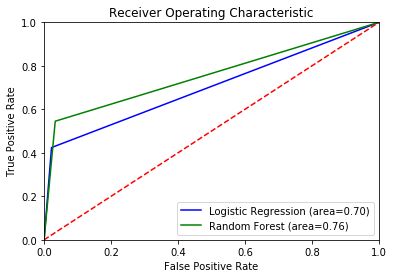

In [286]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_pred)
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,rf_pred)

roc_auc=roc_auc_score(y_test,y_pred)
roc_auc_rf=roc_auc_score(y_test,rf_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='Logistic Regression (area=%0.2f)'%roc_auc)
plt.plot(fpr_rf,tpr_rf,'g',label='Random Forest (area=%0.2f)'%roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

